In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Missing data
Missig data occurs when values are simply absent or contain `NaN` (not a number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization
- Arithmetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove rows or columns containing missing data
- Impute with mean or median
- Impute with mode (most frequently occuring feature)
- Impute with forward or backward field
- Interpolate data between two points

*Note: Domain knowledge is often needed to decide how to fill nulls.*

In [3]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df = df[df > 0]
df

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,1.055592,1.344136,NaN,0.357666
2,1.282671,0.622780,0.379783,NaN
3,0.334018,NaN,NaN,0.835527
4,NaN,NaN,0.296075,0.459162
5,1.246252,0.736700,1.865774,NaN
6,NaN,0.823417,NaN,0.364463
7,0.790295,0.799135,NaN,0.251713
8,NaN,0.471132,NaN,NaN
9,0.426476,0.368788,0.532143,NaN


In [4]:
copy = df.copy()
copy.drop(columns="C", inplace=True)
copy

,A,B,D
0,NaN,NaN,NaN
1,1.055592,1.344136,0.357666
2,1.282671,0.622780,NaN
3,0.334018,NaN,0.835527
4,NaN,NaN,0.459162
5,1.246252,0.736700,NaN
6,NaN,0.823417,0.364463
7,0.790295,0.799135,0.251713
8,NaN,0.471132,NaN
9,0.426476,0.368788,NaN


## dropna
Remove rows (default), or columns, containing *null*.

**Parameters**
- `how="any"` (default), or `"all"`
- `thresh` = set number of (non-missing) values a row must contain not to be dropped.
- `subset` only looks for NaN in subset of columns (or rows)
- `axis="index"` (default) or `"columns"`

In [18]:
copy.dropna(axis="columns", subset=2)

,A,B
0,NaN,NaN
1,1.055592,1.344136
2,1.282671,0.622780
3,0.334018,NaN
4,NaN,NaN
5,1.246252,0.736700
6,NaN,0.823417
7,0.790295,0.799135
8,NaN,0.471132
9,0.426476,0.368788


### fillna
Fill missing values.

In [1]:
copy = df.copy()
copy["A"].fillna(copy["A"].median(), inplace=True)
# copy["B"].mode() # mainly for categorical data

copy["B"].ffill(inplace=True) # forward fill
copy["D"].bfill(inplace=True) # backward fill
copy["C"].interpolate(inplace=True) # interpolates data between two fields
copy

NameError: name 'df' is not defined

,A,B,C,D,is NA
0,NaN,NaN,NaN,NaN,True
1,1.055592,1.344136,NaN,0.357666,False
2,1.282671,0.622780,0.379783,NaN,False
3,0.334018,NaN,NaN,0.835527,False
4,0.790135,NaN,0.296075,0.459162,True
5,1.246252,0.736700,1.865774,NaN,False
6,1.018273,0.823417,NaN,0.364463,True
7,0.790295,0.799135,NaN,0.251713,False
8,0.608385,0.471132,NaN,NaN,True
9,0.426476,0.368788,0.532143,NaN,False


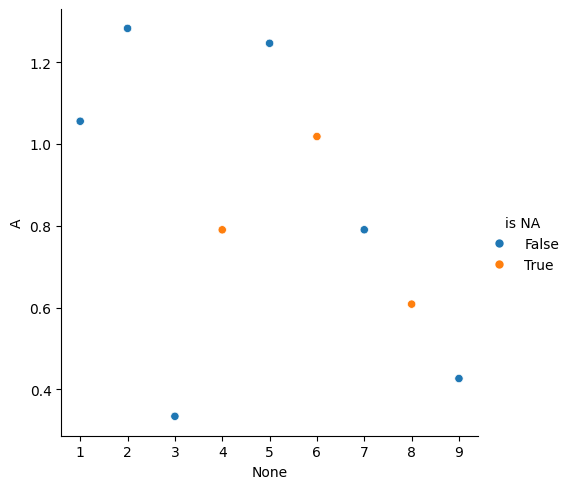

In [47]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].interpolate(inplace=True)
sns.relplot(x=copy.index, y="A", hue="is NA", data=copy)
copy